In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd drive/MyDrive/Github/master_thesis
%cd drive/MyDrive/GitHub/master-thesis
from clustering.utils import *

/content/drive/MyDrive/GitHub/master-thesis


# Preprocessing

In [4]:
beh_cols = get_behaviour_cols()
df_pca_input = get_preprocessed_data(impute=True, impute_cols=beh_cols)

In [5]:
scaler = MinMaxScaler()
pca_input = scaler.fit_transform(df_pca_input[beh_cols].to_numpy())
pca_input.shape

(118151, 34)

# PCA

In [6]:
pca = PCA(whiten=True)
x_pca = pca.fit_transform(pca_input)
df_pca = pd.DataFrame(x_pca)
for column in df_pca.columns:
  df_pca.rename(columns={column: 'PC_'+str(column)}, inplace=True)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33
0,-0.854317,-0.235050,-0.195083,0.094378,-0.887260,-0.259565,-0.810860,0.544818,0.410068,-1.517090,...,0.782882,-0.086052,0.594594,-0.607170,0.160527,0.742970,0.854957,1.054580,-1.033210,0.594232
1,-0.987724,0.014360,0.739622,0.573542,-0.304850,-0.570043,0.862927,-0.647560,1.578188,1.793349,...,1.135790,-0.284463,0.339852,-1.369788,-0.186648,-1.616137,-1.200834,1.043071,1.707506,0.255341
2,0.406783,-1.299977,1.554404,1.666682,1.178919,1.427936,0.052764,0.443942,0.751983,-0.044109,...,4.324160,-1.662024,-2.164818,-1.975492,0.957682,0.518701,-3.677890,0.681235,1.476177,0.658160
3,1.866191,-1.308214,3.505976,-1.999047,0.013720,0.595474,0.299455,1.126180,1.175142,1.942165,...,-0.117905,-1.543630,-0.696756,1.019091,-1.381439,-2.012476,1.383035,-0.896740,0.924806,0.381582
4,-1.124539,-0.778385,-0.320043,-0.405601,1.117444,1.188400,2.012344,-1.625264,-0.427006,-0.016541,...,0.997947,0.685593,-3.680576,0.451504,-0.782911,-0.245030,-1.148246,-0.263331,-0.105407,0.181207


# Evaluate Results

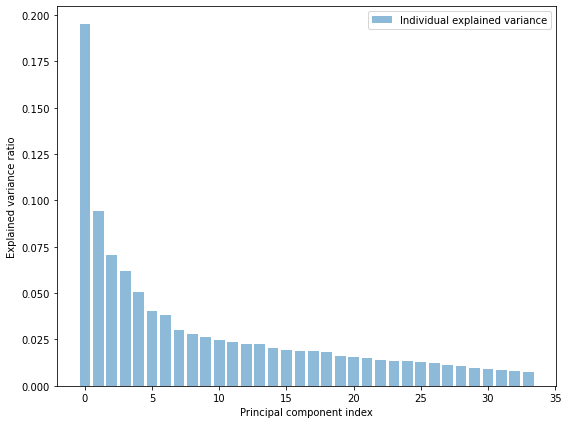

In [13]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

In [8]:
num_comp_avg = (exp_var_pca > exp_var_pca.mean()).sum()
explained_variance = cum_sum_eigenvalues[num_comp_avg-1]
print(f'{num_comp_avg} Komponenten sind größer als der Durchschnitt und erklären damit {np.round(explained_variance * 100, 2)}% der Varianz in den Daten.')

8 Komponenten sind größer als der Durchschnitt und erklären damit 58.15% der Varianz in den Daten.


In [10]:
cum_sum_eigenvalues

array([0.19496515, 0.28952319, 0.36036271, 0.42204493, 0.47292314,
       0.51315691, 0.5511674 , 0.58153246, 0.60938604, 0.63574539,
       0.66040343, 0.68405785, 0.70683142, 0.72935077, 0.74985574,
       0.76926912, 0.78821223, 0.80678929, 0.82481625, 0.84071362,
       0.85629747, 0.87107482, 0.88505075, 0.89846377, 0.91158533,
       0.92430528, 0.93649231, 0.9476916 , 0.95820615, 0.96786005,
       0.97678156, 0.98509829, 0.99281425, 1.        ])

Die Dimensionen sollen soweit reduziert werden, dass noch 80% der Varianz benötigt werden.

In [11]:
nr_pc_80 = (cum_sum_eigenvalues<=0.8).sum()
print(nr_pc_80,  ' Werte erklären 80% der Daten.')

17  Werte erklären 80% der Daten.


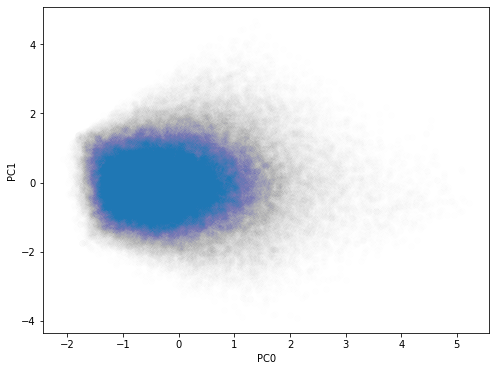

In [14]:
plt.scatter(x=df_pca['PC_0'], y=df_pca['PC_1'], alpha=0.005)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

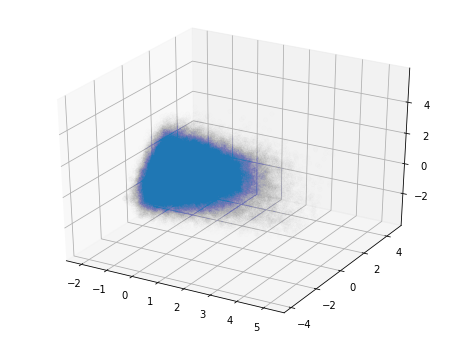

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_pca['PC_0'], df_pca['PC_1'], df_pca['PC_2'], alpha=0.005)

# Write Data

In [ ]:
col_names = df_pca.iloc[:,:nr_pc_80].columns.tolist()
df_pca_write = pd.concat([df_pca.iloc[:,:nr_pc_80].copy(), df_pca_input], axis=1)
df_pca_write.dropna(subset=col_names, inplace=True)
df_pca_write.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123230 entries, 0 to 123229
Data columns (total 90 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   PC_0                                           123230 non-null  float64
 1   PC_1                                           123230 non-null  float64
 2   PC_2                                           123230 non-null  float64
 3   PC_3                                           123230 non-null  float64
 4   PC_4                                           123230 non-null  float64
 5   PC_5                                           123230 non-null  float64
 6   PC_6                                           123230 non-null  float64
 7   PC_7                                           123230 non-null  float64
 8   PC_8                                           123230 non-null  float64
 9   PC_9                                 

In [ ]:
df_pca_write.to_csv('data/preprocessing/dim_reduction/220422_pca_data.csv', index=False)

# Evaluate PCA Components

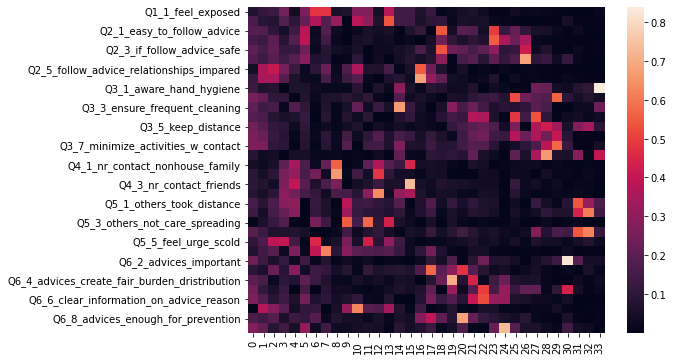

In [16]:
import seaborn as sns
df_components = pd.DataFrame(pca.components_, columns=beh_cols).transpose()
df_components = df_components.apply(lambda x: np.abs(x))
sns.heatmap(df_components) # .iloc[:,:nr_pc_80]